In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from fbprophet import Prophet
from sklearn.metrics import mean_squared_error, mean_absolute_error
plt.style.use('fivethirtyeight')

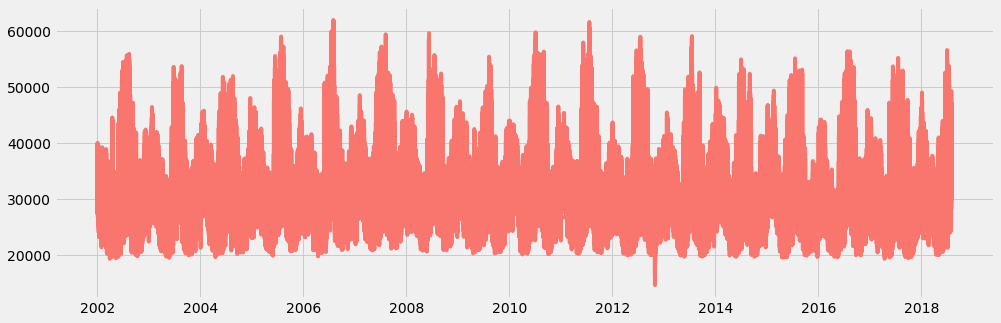

In [30]:
pjme = pd.read_csv('PJME_hourly.csv', index_col=['Datetime'], parse_dates=['Datetime'])
plt.figure(figsize=(15,5))
plt.plot(pjme.index, pjme['PJME_MW'], color='#F8766D')

In [31]:
def create_features(df, label=None):
    df = df.copy()
    df['date'] = df.index
    df['hour'] = df['date'].dt.hour
    df['dayofweek'] = df['date'].dt.dayofweek
    df['quarter'] = df['date'].dt.quarter
    df['month'] = df['date'].dt.month
    df['year'] = df['date'].dt.year
    df['dayofyear'] = df['date'].dt.dayofyear
    df['dayofmonth'] = df['date'].dt.day
    df['weekofyear'] = df['date'].dt.weekofyear
    
    X = df[['hour', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear', 
           'dayofmonth', 'weekofyear']]
    
    if label:
        y = df[label]
        return X, y
    return X

X, y =create_features(pjme, label = 'PJME_MW')

features_and_targets = pd.concat([X, y], axis =1)

In [32]:
features_and_targets.head()

,hour,dayofweek,quarter,month,year,dayofyear,dayofmonth,weekofyear,PJME_MW
Datetime,,,,,,,,,
2002-12-31 01:00:00,1,1,4,12,2002,365,31,1,26498.0
2002-12-31 02:00:00,2,1,4,12,2002,365,31,1,25147.0
2002-12-31 03:00:00,3,1,4,12,2002,365,31,1,24574.0
2002-12-31 04:00:00,4,1,4,12,2002,365,31,1,24393.0
2002-12-31 05:00:00,5,1,4,12,2002,365,31,1,24860.0


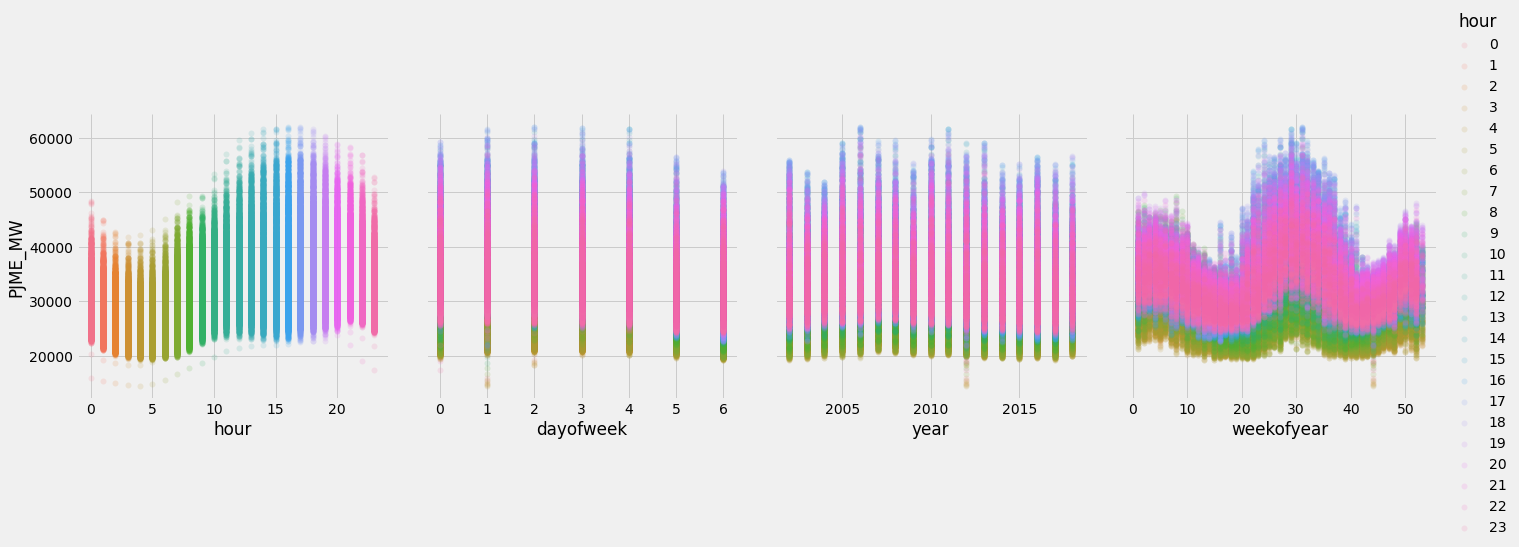

In [45]:
# plt.figure(figsize = (15,8))
sns.pairplot(features_and_targets,hue='hour', x_vars=['hour', 'dayofweek', 'year', 'weekofyear'], y_vars='PJME_MW', height=5, plot_kws={'alpha':0.15, 'linewidth':0})

In [76]:
split_date = '01-Jan-2015'
pjme_train = pjme.loc[pjme.index <= split_date].copy()
pjme_test = pjme.loc[pjme.index > split_date]

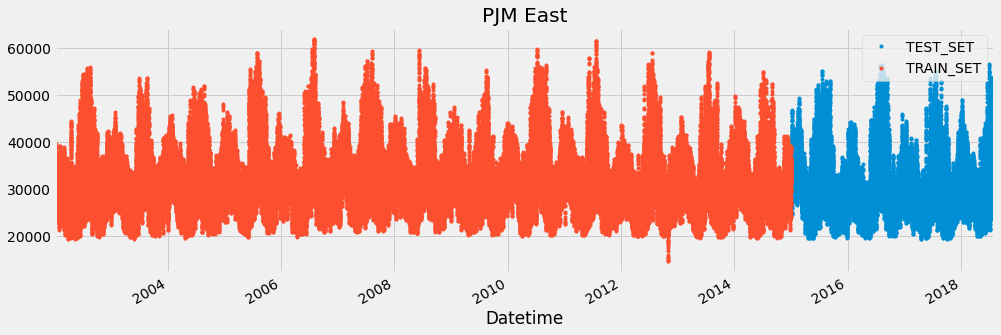

In [57]:
pjme_test.rename(columns={'PJME_MW':'TEST_SET'}).join(pjme_train.rename(columns={'PJME_MW':'TRAIN_SET'}), how='outer').plot(figsize=(15, 5), title='PJM East', style='.')
plt.show()

In [92]:
pjme_train.reset_index().rename(columns={'Datetime':'ds', 'PJME_MW':'y'}).head()

,ds,y
0,2002-12-31 01:00:00,26498.0
1,2002-12-31 02:00:00,25147.0
2,2002-12-31 03:00:00,24574.0
3,2002-12-31 04:00:00,24393.0
4,2002-12-31 05:00:00,24860.0


In [93]:
model = Prophet()
model.fit(pjme_train.reset_index().rename(columns={'Datetime':'ds', 'PJME_MW':'y'}))

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


In [99]:
pjme_test_fcst = model.predict(df=pjme_test.reset_index().rename(columns={'Datetime':'ds'}))

In [124]:
pjme_test_fcst.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-01 01:00:00,31222.751830,24024.687656,32817.623592,31222.751830,31222.751830,-2859.390279,-2859.390279,-2859.390279,-4430.401906,...,1281.399844,1281.399844,1281.399844,289.611783,289.611783,289.611783,0.0,0.0,0.0,28363.361551
1,2015-01-01 02:00:00,31222.716042,22358.645967,30937.530258,31222.716042,31222.716042,-4363.798060,-4363.798060,-4363.798060,-5927.339042,...,1272.641617,1272.641617,1272.641617,290.899366,290.899366,290.899366,0.0,0.0,0.0,26858.917982
2,2015-01-01 03:00:00,31222.680253,21389.565729,30536.834762,31222.680253,31222.680253,-5235.505146,-5235.505146,-5235.505146,-6790.411126,...,1262.677501,1262.677501,1262.677501,292.228479,292.228479,292.228479,0.0,0.0,0.0,25987.175107
3,2015-01-01 04:00:00,31222.644465,21173.300195,30442.627063,31222.644465,31222.644465,-5377.047623,-5377.047623,-5377.047623,-6922.277884,...,1251.631114,1251.631114,1251.631114,293.599147,293.599147,293.599147,0.0,0.0,0.0,25845.596841
4,2015-01-01 05:00:00,31222.608676,22369.115726,31196.433102,31222.608676,31222.608676,-4702.696009,-4702.696009,-4702.696009,-6237.345687,...,1239.638282,1239.638282,1239.638282,295.011396,295.011396,295.011396,0.0,0.0,0.0,26519.912668


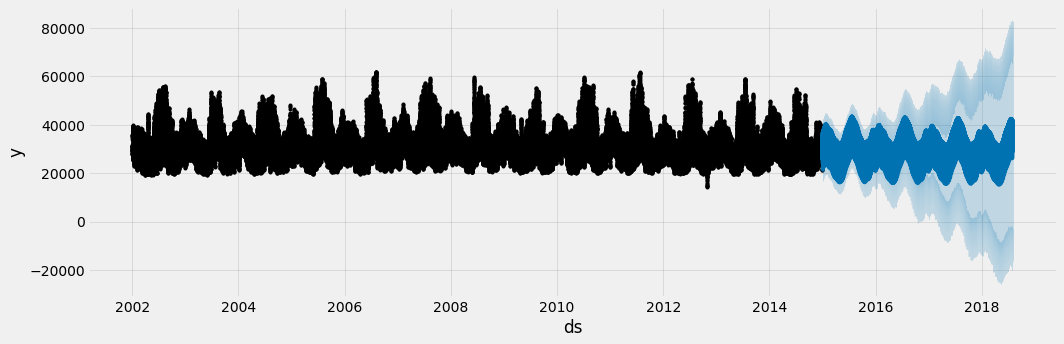

In [121]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
model.plot(pjme_test_fcst, ax=ax)
plt.show()

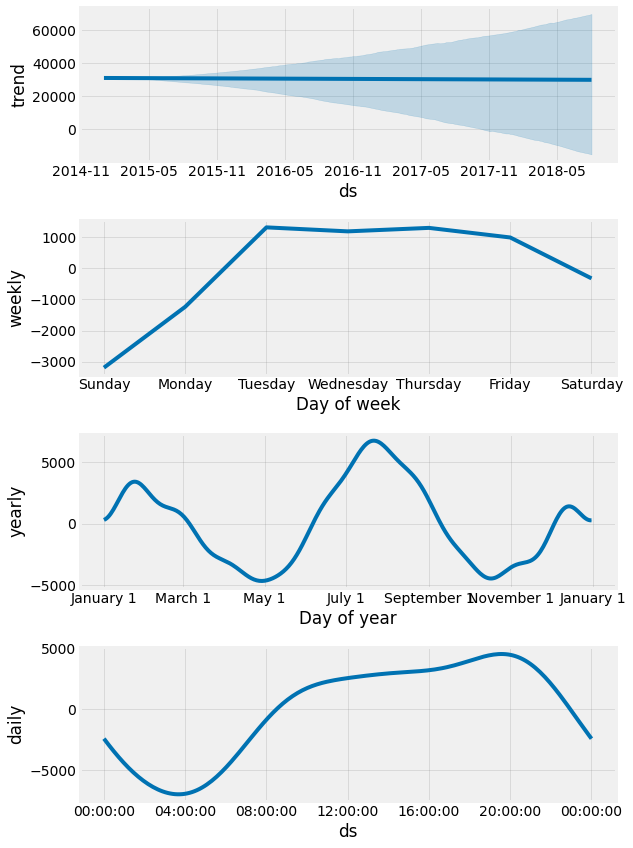

In [125]:
fig = model.plot_components(pjme_test_fcst)

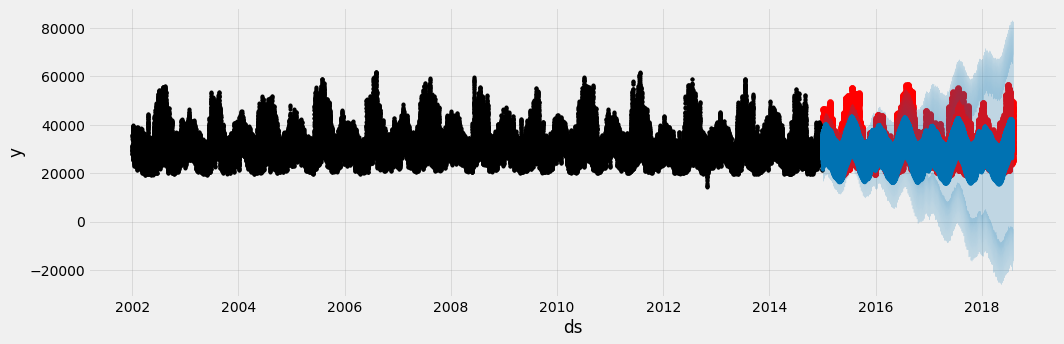

In [144]:
#Compare with actual data
f, ax = plt.subplots(1)
f.set_figwidth(15)
f.set_figheight(5)
ax.scatter(pjme_test.index, pjme_test['PJME_MW'], color='r')
fig = model.plot(pjme_test_fcst, ax=ax)

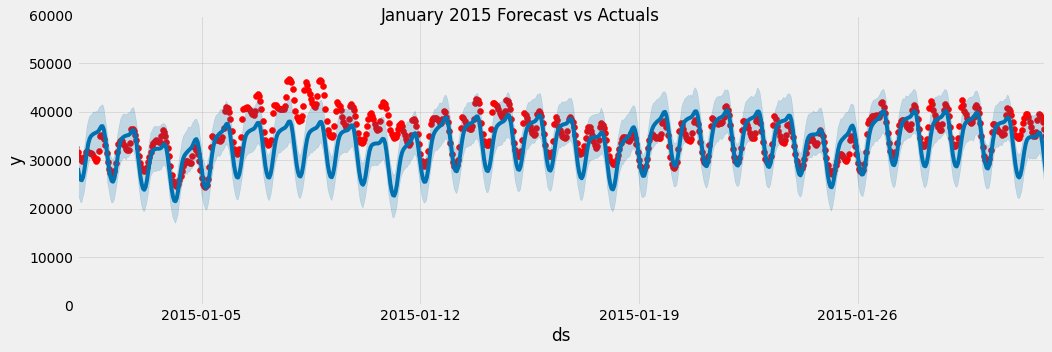

In [207]:
#First month
f, ax = plt.subplots(1)
f.set_figwidth(15)
f.set_figheight(5)
ax.scatter(pjme_test.index, pjme_test['PJME_MW'], color='r')
fig = model.plot(pjme_test_fcst, ax=ax)
ax.set_xbound(lower=dt.datetime.strptime('01-01-2015', '%d-%m-%Y'),
              upper=dt.datetime.strptime('01-02-2015', '%d-%m-%Y'))
ax.set_ylim(0, 60000)
plot = plt.suptitle('January 2015 Forecast vs Actuals')

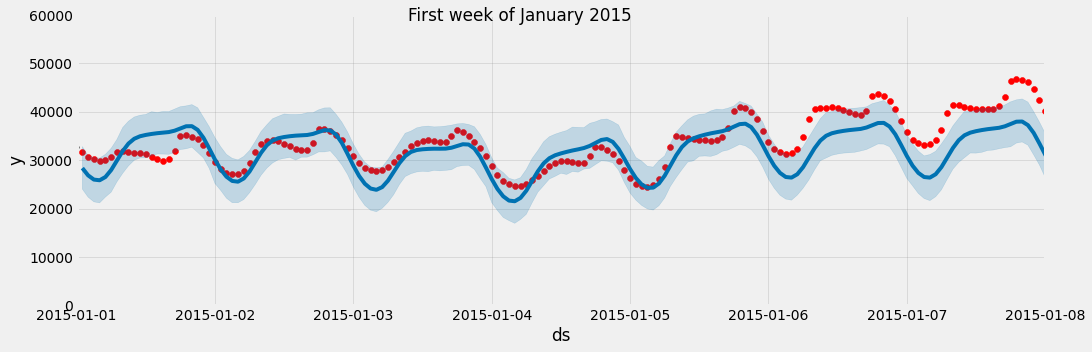

In [214]:
#First week
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(pjme_test.index, pjme_test['PJME_MW'],color='r')
fig = model.plot(pjme_test_fcst, ax=ax)
ax.set_xbound(lower=dt.datetime.strptime('01-01-2015', '%d-%m-%Y'),
             upper=dt.datetime.strptime('08-01-2015', '%d-%m-%Y'))
ax.set_ybound(lower=0, upper=60000)
plot = plt.suptitle('First week of January 2015')

In [225]:
mean_squared_error(y_true=pjme_test['PJME_MW'], y_pred=pjme_test_fcst['yhat'])

43733838.557264134

In [226]:
mean_absolute_error(y_true=pjme_test['PJME_MW'], y_pred=pjme_test_fcst['yhat'])

5180.722189141477

In [236]:
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar

cal=calendar()
train_holidays = cal.holidays(start=pjme_train.index.min(),
                            end=pjme_train.index.max())
test_holidays = cal.holidays(start=pjme_test.index.min(),
                             end=pjme_test.index.max())

In [267]:
pjme['date'] = pjme.index.date
pjme['is_holiday'] = pjme.date.isin([d.date() for d in cal.holidays()])
holiday_df = pjme.loc[pjme['is_holiday']].reset_index().rename(columns={'Datetime':'ds'})
holiday_df['holiday'] = 'USFederalHoliday'
holiday_df = holiday_df.drop(['PJME_MW', 'date', 'is_holiday'], axis=1)
holiday_df['ds'] = pd.to_datetime(holiday_df['ds'])
holiday_df['ds']

0      2003-01-01 00:00:00
1      2002-12-25 01:00:00
2      2002-12-25 02:00:00
3      2002-12-25 03:00:00
4      2002-12-25 04:00:00
               ...        
3954   2018-01-01 19:00:00
3955   2018-01-01 20:00:00
3956   2018-01-01 21:00:00
3957   2018-01-01 22:00:00
3958   2018-01-01 23:00:00
Name: ds, Length: 3959, dtype: datetime64[ns]

In [270]:
model_with_holidays = Prophet(holidays=holiday_df)
model_with_holidays.fit(pjme_train.reset_index().rename(columns={'Datetime':'ds', 'PJME_MW':'y'}))

In [274]:
pjme_test_fcst_with_hols = model_with_holidays.predict(pjme_test.reset_index().rename(columns={'Datetime':'ds'}))

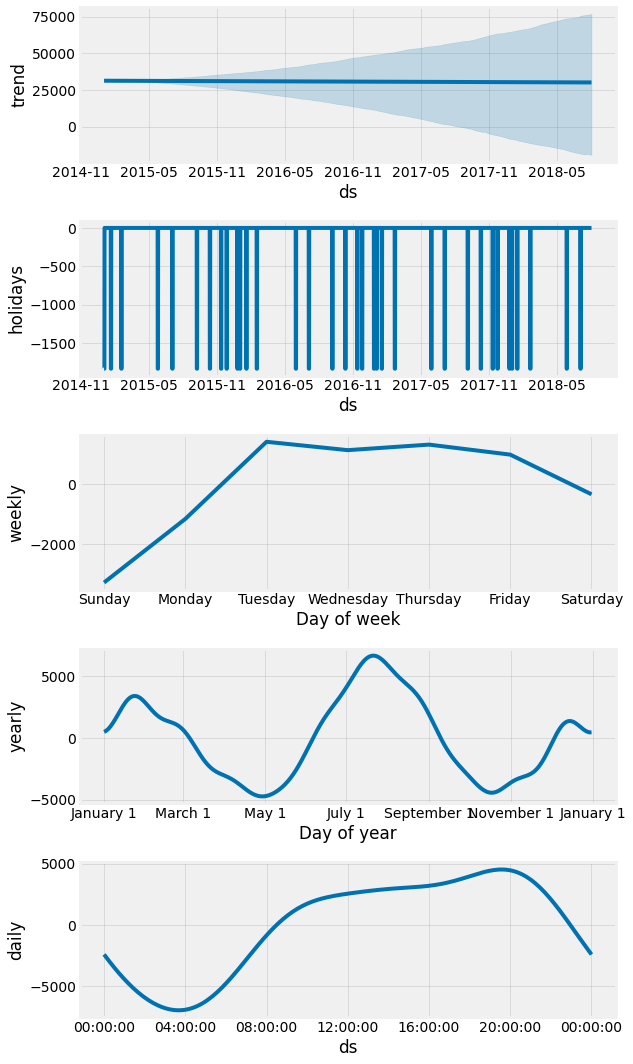

In [285]:
fig2 = model_with_holidays.plot_components(pjme_test_fcst_with_hols)

In [286]:
mean_squared_error(y_true=pjme_test['PJME_MW'], y_pred=pjme_test_fcst_with_hols['yhat'])

43873593.85964072

In [287]:
mean_absolute_error(y_true=pjme_test['PJME_MW'], y_pred=pjme_test_fcst_with_hols['yhat'])

5190.275657283203

Text(0.5, 0.98, '4th July on non-holiday model')

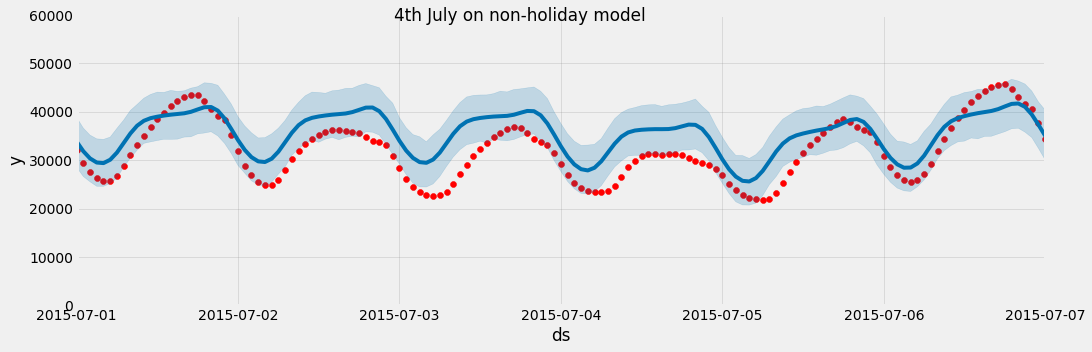

In [289]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(pjme_test.index, pjme_test['PJME_MW'], color='r')
fig = model.plot(pjme_test_fcst, ax=ax)
ax.set_xbound(lower=dt.datetime.strptime('01-07-2015', '%d-%m-%Y'),
               upper=dt.datetime.strptime('07-07-2015', '%d-%m-%Y'))
ax.set_ybound(lower=0, upper=60000)
plt.suptitle('4th July on non-holiday model')

Text(0.5, 0.98, '4th July on holiday model')

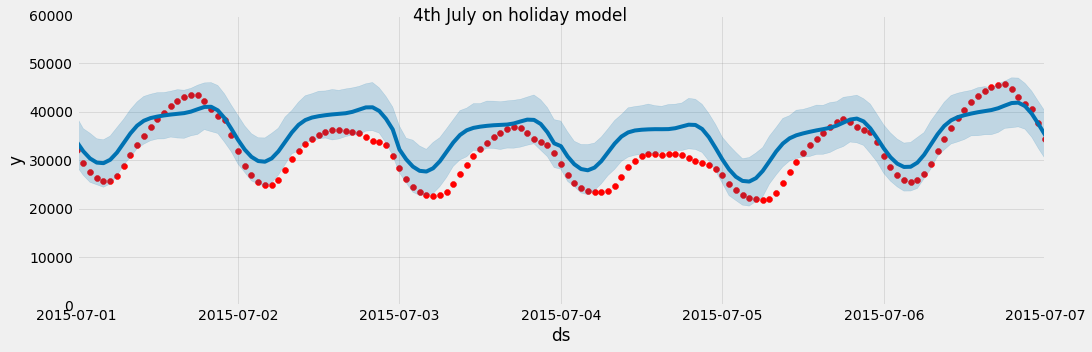

In [291]:
f, ax = plt.subplots(1)
f.set_figheight(5)
f.set_figwidth(15)
ax.scatter(pjme_test.index, pjme_test['PJME_MW'], color='r')
fig = model_with_holidays.plot(pjme_test_fcst_with_hols, ax=ax)
ax.set_xbound(lower=dt.datetime.strptime('01-07-2015', '%d-%m-%Y'),
               upper=dt.datetime.strptime('07-07-2015', '%d-%m-%Y'))
ax.set_ybound(lower=0, upper=60000)
plt.suptitle('4th July on holiday model')

In [318]:
jul4_test = pjme_test.query('Datetime >= 20160704 and Datetime < 20160705')
jul4_pred = pjme_test_fcst.query('ds>=20160704 and ds<20160705')
jul4_pred_holiday_model = pjme_test_fcst_with_hols.query('ds>=20160704 and ds<20160705')

In [323]:
#Non-holiday Model Error
mean_absolute_error(y_true=jul4_test, y_pred=jul4_pred['yhat'])

7401.341710683955

In [322]:
#Holiday model Error
mean_absolute_error(y_true=jul4_test, y_pred=jul4_pred_holiday_model['yhat'])

5729.283718705191

ConversionError: Failed to convert value(s) to axis units: '01-01-2012'

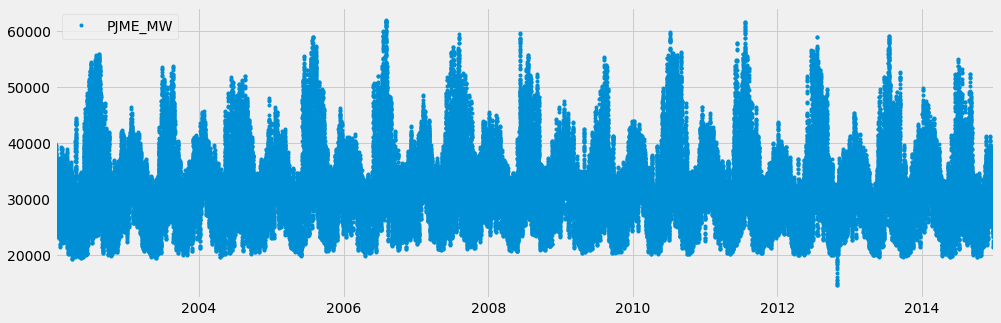

In [325]:
#Data Cleaning
ax = pjme_train.plot(style='.', figsize=(15,5), title'PJME_MW with bad data highlighted', xlim=('01-01-2012','01-01-2013'))